# Pandas DateTime Exploration #

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import datetime as dt
import warnings

In [2]:
# using data from previous project on car accidents in Chicago
df = pd.read_csv('data/Crashes.csv')
warnings.filterwarnings('ignore')

C:\Users\sethk\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# it's a large dataset so let's just use 100 records
sample_df = df[:100]

In [4]:
# fixing columns names
sample_df.columns = sample_df.columns.str.strip().str.lower()

In [5]:
sample_df['crash_date'].head(10)

0    07/10/2019 05:56:00 PM
1    06/30/2017 04:00:00 PM
2    07/10/2020 10:25:00 AM
3    07/11/2020 01:00:00 AM
4    07/08/2020 02:00:00 PM
5    03/21/2019 10:50:00 PM
6    03/26/2018 02:23:00 PM
7    07/10/2020 10:20:00 PM
8    07/09/2020 05:06:00 PM
9    06/29/2020 05:55:00 PM
Name: crash_date, dtype: object

A quick look at how we can pull the years out without pd datetime.

In [6]:
sample_df['crash_year'] = sample_df.crash_date.str.slice(6, 11).astype(int)
sample_df['crash_year']

0     2019
1     2017
2     2020
3     2020
4     2020
      ... 
95    2018
96    2019
97    2020
98    2019
99    2019
Name: crash_year, Length: 100, dtype: int32

In [7]:
sample_df.crash_date.dtypes

dtype('O')

Above we imported a DataFrame and saw that it's date function is entered as a string.

This is problematic because it is very fragile and it would be really painful to try and code a consistent formula if we wanted to, say, pull the hour, day, month, etc. out.

### Using pd.to_datetime

In [8]:
sample_df['crash_date'] = pd.to_datetime(sample_df['crash_date'])

In [9]:
sample_df.crash_date

0    2019-07-10 17:56:00
1    2017-06-30 16:00:00
2    2020-07-10 10:25:00
3    2020-07-11 01:00:00
4    2020-07-08 14:00:00
             ...        
95   2018-09-26 08:27:00
96   2019-01-16 16:28:00
97   2020-02-19 12:50:00
98   2019-08-30 17:32:00
99   2019-07-08 13:25:00
Name: crash_date, Length: 100, dtype: datetime64[ns]

### Now that this is in datetime format, we can explore the data and sort by date in any way we see fit.

In [10]:
# creating a timestamp for 2019
timestamp = pd.to_datetime('1/1/2019')
timestamp

Timestamp('2019-01-01 00:00:00')

In [11]:
# creating a subsection of the df that is just any data from 2019 onwards
new_data = sample_df.loc[sample_df.crash_date >= timestamp, :]

In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 99
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_record_id                56 non-null     object        
 1   rd_no                          56 non-null     object        
 2   crash_date_est_i               4 non-null      object        
 3   crash_date                     56 non-null     datetime64[ns]
 4   posted_speed_limit             56 non-null     int64         
 5   traffic_control_device         56 non-null     object        
 6   device_condition               56 non-null     object        
 7   weather_condition              56 non-null     object        
 8   lighting_condition             56 non-null     object        
 9   first_crash_type               56 non-null     object        
 10  trafficway_type                56 non-null     object        
 11  lane_cnt             

In [13]:
# we can take a quick peak at the days in our new dataset
new_data['day'] = new_data['crash_date'].dt.dayofyear

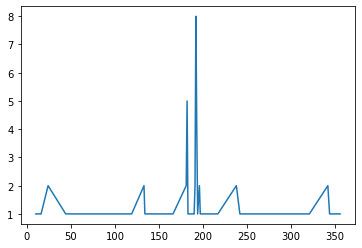

In [14]:
# let's plot see the worst dates in the dataframe
new_data.day.value_counts().sort_index().plot();

In [15]:
# Back to our whole df, what's the time difference?
sample_df.crash_date.max() - sample_df.crash_date.min()

Timedelta('1725 days 05:15:00')

In [16]:
# what if we just want to see winter 2018-19?s
winter = pd.date_range(start=pd.Timestamp("2018-12-21 00:00"), end=pd.Timestamp("2019-03-20 23:59:59"))
# winter is stored as datetime, but we can also see the actual dates and times using code like below
winter.strftime('%B %d, %Y, %r')

Index(['December 21, 2018, 12:00:00 AM', 'December 22, 2018, 12:00:00 AM',
       'December 23, 2018, 12:00:00 AM', 'December 24, 2018, 12:00:00 AM',
       'December 25, 2018, 12:00:00 AM', 'December 26, 2018, 12:00:00 AM',
       'December 27, 2018, 12:00:00 AM', 'December 28, 2018, 12:00:00 AM',
       'December 29, 2018, 12:00:00 AM', 'December 30, 2018, 12:00:00 AM',
       'December 31, 2018, 12:00:00 AM', 'January 01, 2019, 12:00:00 AM',
       'January 02, 2019, 12:00:00 AM', 'January 03, 2019, 12:00:00 AM',
       'January 04, 2019, 12:00:00 AM', 'January 05, 2019, 12:00:00 AM',
       'January 06, 2019, 12:00:00 AM', 'January 07, 2019, 12:00:00 AM',
       'January 08, 2019, 12:00:00 AM', 'January 09, 2019, 12:00:00 AM',
       'January 10, 2019, 12:00:00 AM', 'January 11, 2019, 12:00:00 AM',
       'January 12, 2019, 12:00:00 AM', 'January 13, 2019, 12:00:00 AM',
       'January 14, 2019, 12:00:00 AM', 'January 15, 2019, 12:00:00 AM',
       'January 16, 2019, 12:00:00 AM', 

In [17]:
winter_range = (winter.max() - winter.min())
winter_range

Timedelta('89 days 00:00:00')

In [18]:
# stratifying the df to just that winter's data
winter_2019 = sample_df[(sample_df['crash_date'] >= winter[0]) & (sample_df['crash_date'] <= winter[-1])]

In [19]:
winter_2019['crash_date']

26   2019-01-24 06:45:00
64   2019-02-13 09:29:00
77   2019-01-24 15:30:00
79   2019-01-10 14:52:00
88   2018-12-26 18:43:00
96   2019-01-16 16:28:00
Name: crash_date, dtype: datetime64[ns]

In [20]:
# we can also use datetime series functions to explore the dates in different formats
winter_2019.crash_date.dt.week, winter_2019.crash_date.dt.dayofyear, winter_2019.crash_date.dt.dayofweek, winter_2019.crash_date.dt.hour

(26     4
 64     7
 77     4
 79     2
 88    52
 96     3
 Name: crash_date, dtype: int64,
 26     24
 64     44
 77     24
 79     10
 88    360
 96     16
 Name: crash_date, dtype: int64,
 26    3
 64    2
 77    3
 79    3
 88    2
 96    2
 Name: crash_date, dtype: int64,
 26     6
 64     9
 77    15
 79    14
 88    18
 96    16
 Name: crash_date, dtype: int64)

In [21]:
# the datetime library also has useful functions, such as .today() - this works well outside of dataframes.
dt.date.today()

datetime.date(2021, 9, 20)

### This is a small sample of Datetime ###

There's so much more to explore. [Check out the documentation in my blog on Medium](https://medium.com/@sethkaufman7/excuse-me-do-you-have-the-datetime-9c1c944e5d9)!